<a href="https://colab.research.google.com/github/NavyaS26/Internship/blob/main/Seq2Seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, TimeDistributed, RepeatVector
import matplotlib.pyplot as plt


In [12]:
def generate_data(n_samples, sequence_length, vocab_size):
    """
    Generates pairs of random integer sequences and their reverses.
    """
    X = np.random.randint(1, vocab_size, size=(n_samples, sequence_length))
    Y = np.flip(X, axis=1)
    return X, Y

# Parameters for the dataset
n_samples = 10000
sequence_length = 10
vocab_size = 20  # The numbers in our sequences will be from 1 to 19

# Generate the dataset
X, Y = generate_data(n_samples, sequence_length, vocab_size)

# One-hot encode the data
X_one_hot = tf.keras.utils.to_categorical(X, num_classes=vocab_size)
Y_one_hot = tf.keras.utils.to_categorical(Y, num_classes=vocab_size)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Shape of one-hot encoded X:", X_one_hot.shape)
print("Shape of one-hot encoded Y:", Y_one_hot.shape)

print("\nSample input sequence:", X[0])
print("Sample output sequence (reversed):", Y[0])


Shape of X: (10000, 10)
Shape of Y: (10000, 10)
Shape of one-hot encoded X: (10000, 10, 20)
Shape of one-hot encoded Y: (10000, 10, 20)

Sample input sequence: [12 14  7  9  7 13 19 12 10  4]
Sample output sequence (reversed): [ 4 10 12 19 13  7  9  7 14 12]


In [13]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, input_shape=(sequence_length, vocab_size)))
model_rnn.add(RepeatVector(sequence_length))
model_rnn.add(SimpleRNN(128, return_sequences=True))
model_rnn.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model_rnn.summary()

print("\nTraining the SimpleRNN model...")
history_rnn = model_rnn.fit(X_one_hot, Y_one_hot, epochs=20, batch_size=128, validation_split=0.2, verbose=0)
print("RNN Model Training Complete.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        19,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 10, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 20)         │         2,580 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,548 (213.08 KB)

 Trainable params: 54,548 (213.08 KB)

 Non-trainable params: 0 (0.00 B)


Training the SimpleRNN model...
RNN Model Training Complete.


In [20]:
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(sequence_length, vocab_size)))
model_lstm.add(RepeatVector(sequence_length))
model_lstm.add(LSTM(128, return_sequences=True))
model_lstm.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model_lstm.summary()

print("\nTraining the LSTM model...")
history_lstm = model_lstm.fit(X_one_hot, Y_one_hot, epochs=20, batch_size=128, validation_split=0.2, verbose=0)
print("LSTM Model Training Complete.")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        76,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 10, 20)         │         2,580 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,452 (822.08 KB)

 Trainable params: 210,452 (822.08 KB)

 Non-trainable params: 0 (0.00 B)


Training the LSTM model...
LSTM Model Training Complete.


In [21]:
model_gru = Sequential()
model_gru.add(GRU(128, input_shape=(sequence_length, vocab_size)))
model_gru.add(RepeatVector(sequence_length))
model_gru.add(GRU(128, return_sequences=True))
model_gru.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model_gru.summary()

print("\nTraining the GRU model...")
history_gru = model_gru.fit(X_one_hot, Y_one_hot, epochs=20, batch_size=128, validation_split=0.2, verbose=0)
print("GRU Model Training Complete.")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        57,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 10, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 10, 20)         │         2,580 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,252 (622.08 KB)

 Trainable params: 159,252 (622.08 KB)

 Non-trainable params: 0 (0.00 B)


Training the GRU model...
GRU Model Training Complete.


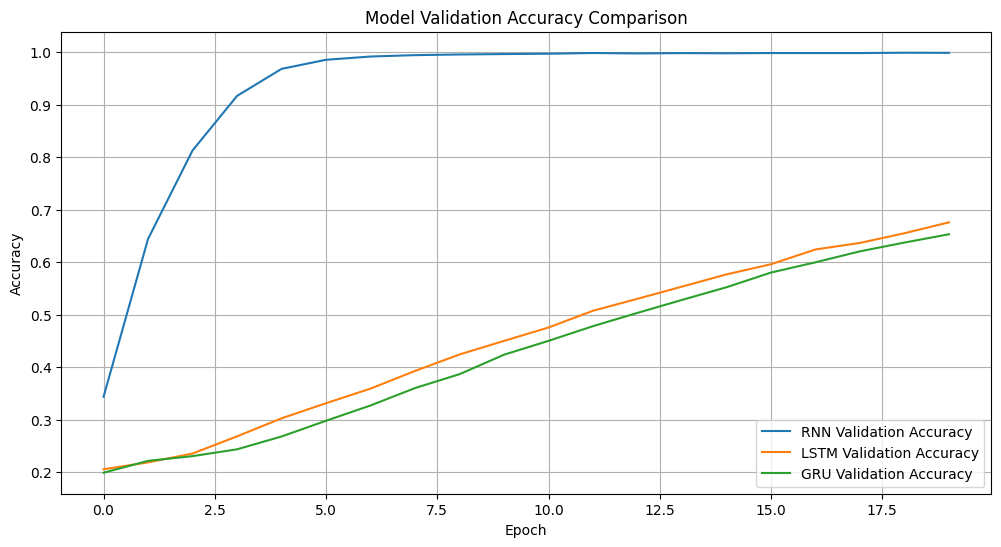

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['val_categorical_accuracy'], label='RNN Validation Accuracy')
plt.plot(history_lstm.history['val_categorical_accuracy'], label='LSTM Validation Accuracy')
plt.plot(history_gru.history['val_categorical_accuracy'], label='GRU Validation Accuracy')
plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
X_test, Y_test = generate_data(1, sequence_length, vocab_size)
X_test_one_hot = tf.keras.utils.to_categorical(X_test, num_classes=vocab_size)
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=vocab_size)

# Make predictions with each model
y_pred_rnn = model_rnn.predict(X_test_one_hot)
y_pred_lstm = model_lstm.predict(X_test_one_hot)
y_pred_gru = model_gru.predict(X_test_one_hot)

# Decode the one-hot encoded predictions
def decode_sequence(seq):
    return [np.argmax(x) for x in seq]

predicted_rnn = decode_sequence(y_pred_rnn[0])
predicted_lstm = decode_sequence(y_pred_lstm[0])
predicted_gru = decode_sequence(y_pred_gru[0])

print("\n--- Model Predictions ---")
print("Input Sequence:  ", X_test[0])
print("Expected Output: ", Y_test[0])
print("--------------------------")
print("RNN Predicted:   ", np.array(predicted_rnn))
print("LSTM Predicted:  ", np.array(predicted_lstm))
print("GRU Predicted:   ", np.array(predicted_gru))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step

--- Model Predictions ---
Input Sequence:   [11  3 15  9  2 18  4 16 15 13]
Expected Output:  [13 15 16  4 18  2  9 15  3 11]
--------------------------
RNN Predicted:    [13 15 16  4 18  2  9 15  3 11]
LSTM Predicted:   [13 15 16  4  4  2  9  3  3 11]
GRU Predicted:    [13 15 16  4 18  2  3 15 15 11]


In [24]:
rnn_acc = model_rnn.evaluate(X_test_one_hot, Y_test_one_hot, verbose=0)[1]
lstm_acc = model_lstm.evaluate(X_test_one_hot, Y_test_one_hot, verbose=0)[1]
gru_acc = model_gru.evaluate(X_test_one_hot, Y_test_one_hot, verbose=0)[1]

print(f"SimpleRNN Accuracy: {rnn_acc:.4f}")
print(f"LSTM Accuracy:     {lstm_acc:.4f}")
print(f"GRU Accuracy:      {gru_acc:.4f}")

SimpleRNN Accuracy: 1.0000
LSTM Accuracy:     0.8000
GRU Accuracy:      0.8000


In [25]:
def plot_model_history(history, model_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

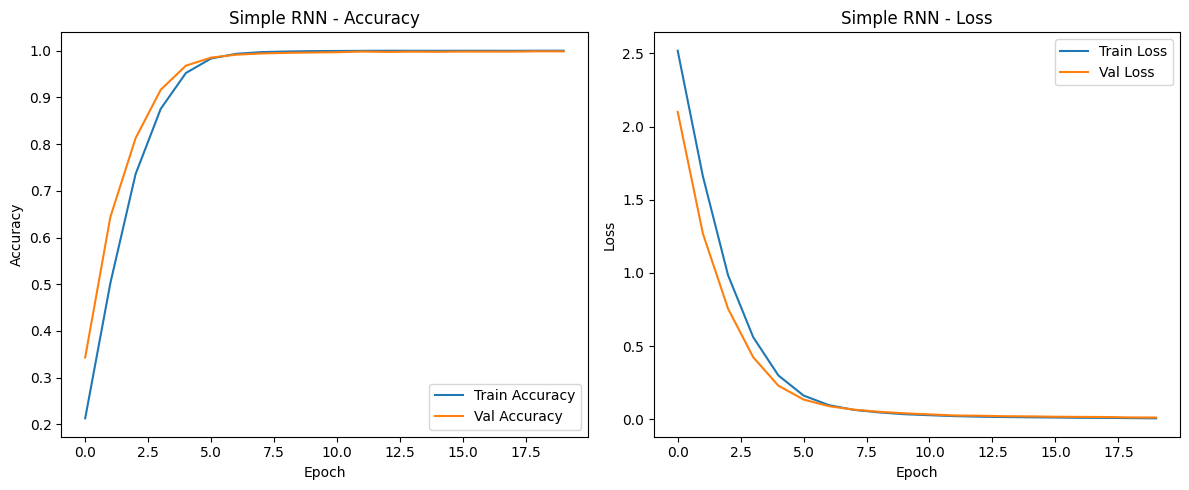

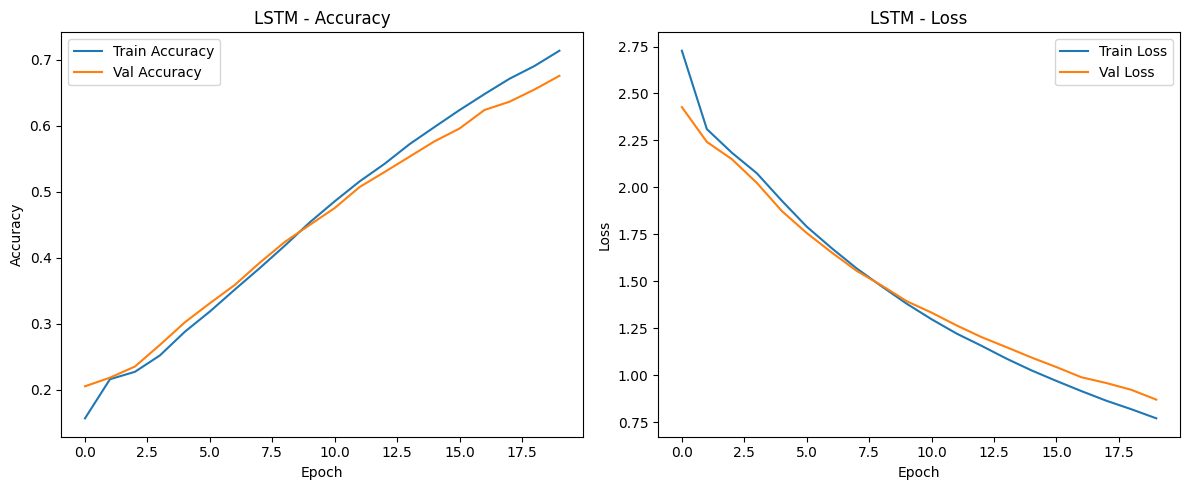

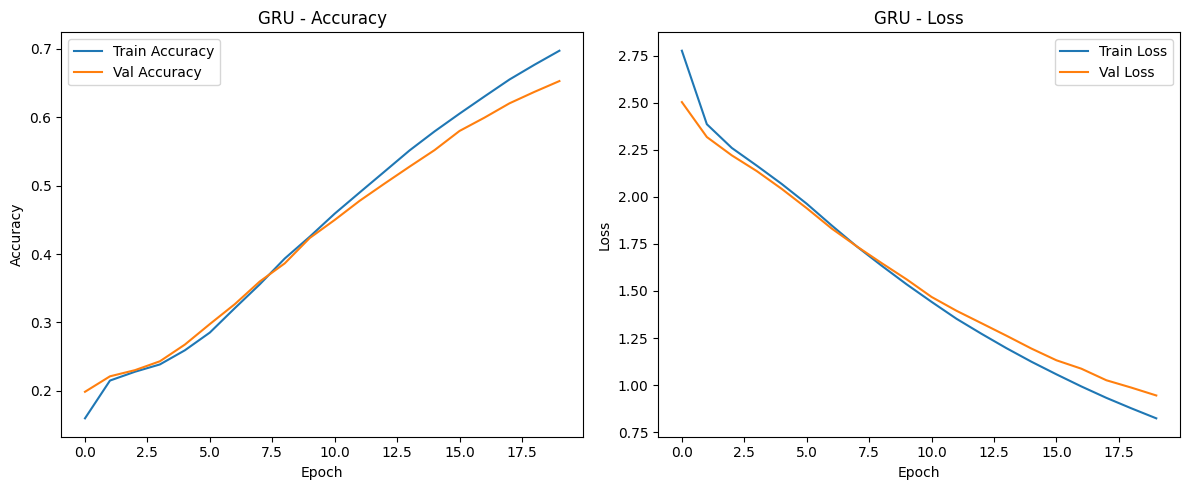

In [26]:
plot_model_history(history_rnn, 'Simple RNN')
plot_model_history(history_lstm, 'LSTM')
plot_model_history(history_gru, 'GRU')